# High Boost Filtering

In [1]:
# Importing relevant packages and doing necessary setup
import cv2
import matplotlib.pyplot as plt
import matplotlib
import PIL
import numpy as np

%matplotlib inline

# for auto-reloading external modules
%load_ext autoreload
%autoreload 2

In [2]:
# Helper function to display multiple images in a plot
def display_images(images, rows, cols, size, title, subtitles):
    fig = plt.figure(figsize = size)
    c = 0
    sz = len(images)
    for i in range(rows):
        for j in range(cols):
            if sz == c:
                break
            ax1 = fig.add_subplot(rows, cols, c + 1)
            ax1.imshow(images[c], cmap = 'gray')
            ax1.set_title(subtitles[c], fontsize = 20)
            c = c + 1
    plt.show()
    # Un comment the below line and comment the above line to save and display
    #plt.savefig('part2.png')

In [3]:
def convolve(im, k):
    im = im.astype(np.float64)
    return cv2.filter2D(im, -1, k).astype(np.int)

### Part 1

In [4]:
def high_boost_filter(size, A):
    kernel = np.ones((size, size))
    kernel[int(size / 2)][int(size / 2)] = 0
    kernel = -kernel
    kernel[int(size / 2)][int(size / 2)] = (size * size * A) - 1
    return kernel

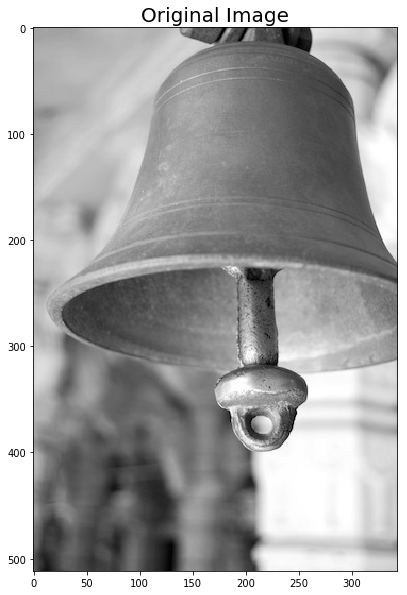

In [5]:
images = []
subtitles = []
img = cv2.imread('../input_data/bell.jpg', cv2.IMREAD_GRAYSCALE)
images.append(img)
subtitles.append('Original Image')
display_images(images, 1, 1, (10, 10), 'title', subtitles)

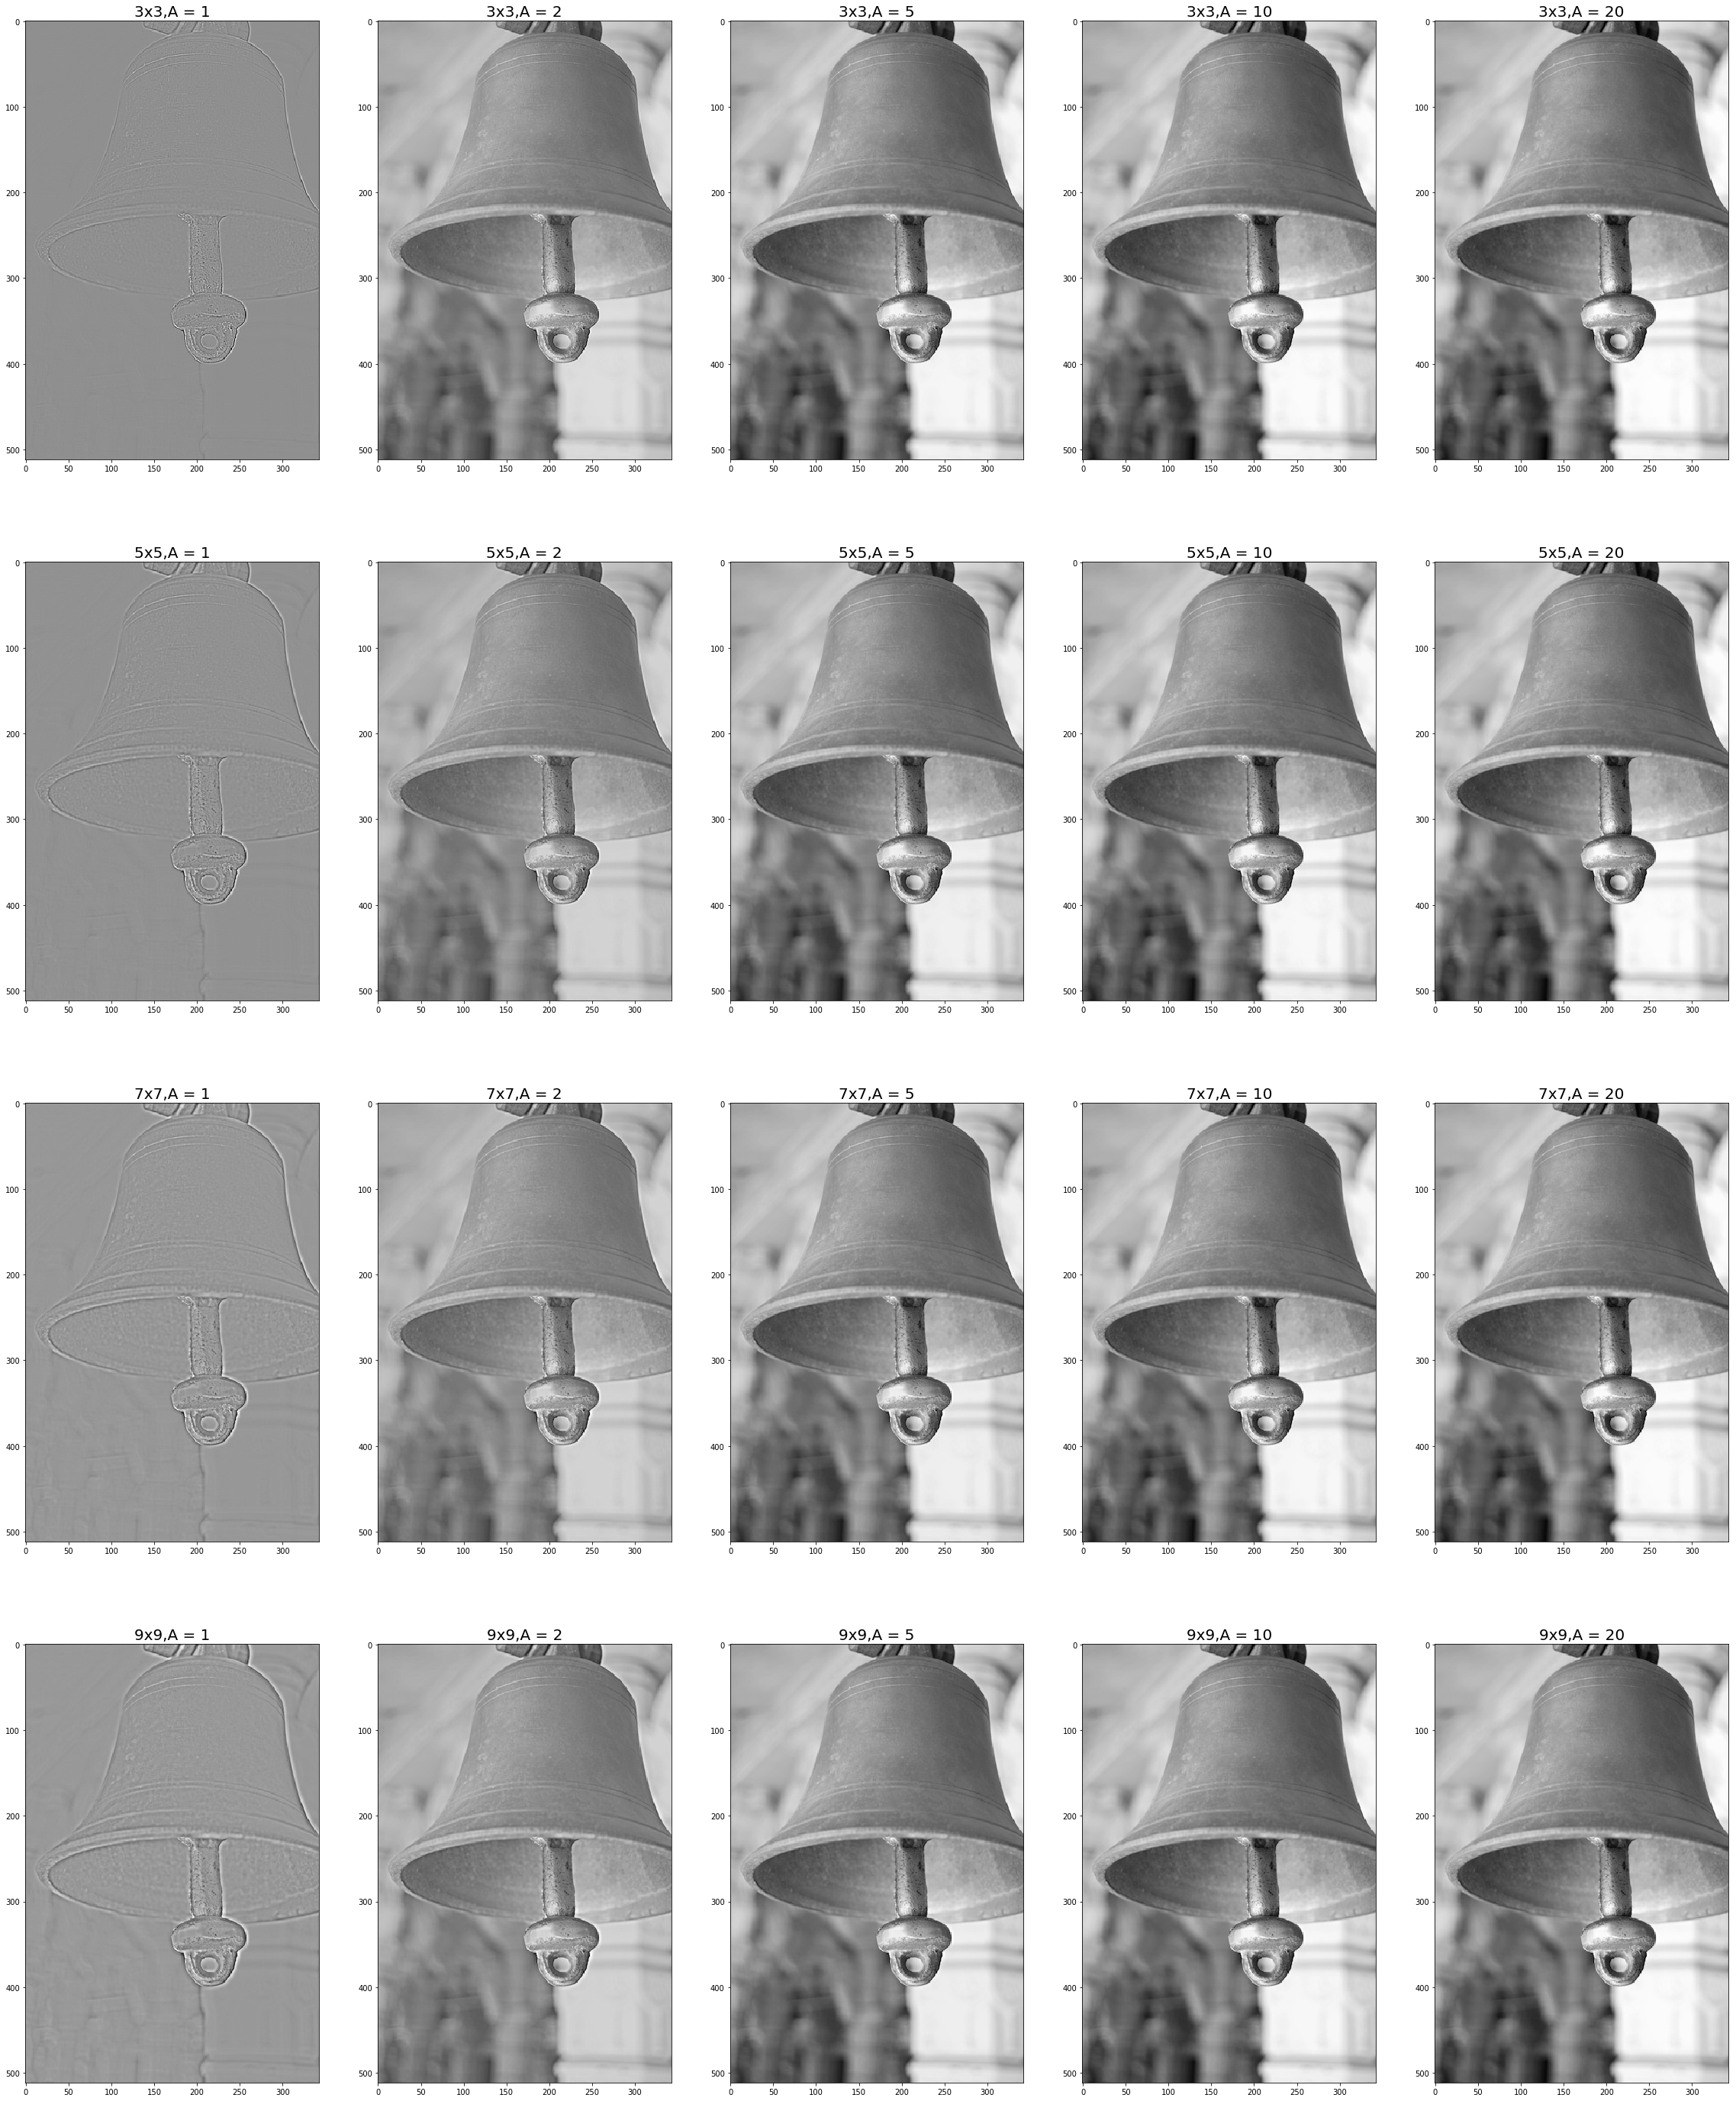

In [6]:
images = []
subtitles = []
for i in range(3, 10, 2):
    for j in [1, 2, 5, 10, 20]:
        kernel = high_boost_filter(i, j)
        output = convolve(img, kernel)
        images.append(output)
        subtitles.append(str(i) + 'x' + str(i) + ',' + 'A = ' + str(j))
display_images(images, 4, 5, (40, 50), 'title', subtitles)